## 1. Load Required Libraries

In [1]:
#load libraries
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as scs
import joblib
import yaml
import pickle
import src.util as utils
from imblearn.under_sampling import RandomUnderSampler

In [2]:
import sys
print(sys.executable)

/home/vennysln/pacmann_mlprocess/ENTER/envs/asistensi/bin/python


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## 2. Load Configuration File

In [4]:
config_dir = "config.yaml"

In [5]:
#Load Configuration Files
def load_config(config_dir):
    with open(config_dir, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [6]:
config = load_config(config_dir)

In [7]:
config = utils.load_config()

## 3. Load Dataset

In [8]:
#Load Data
read_data = pd.read_csv(config["data_source"]["dataset_path"])
df = pd.DataFrame(read_data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Data Validation

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Convert values in column SeniorCitizen to "Yes" and "No"
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: 'No', 1: 'Yes'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Convert TotalCharges dtype from Object to Float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce').fillna(-1)

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns in df
df_encoded = df.copy()

imputer = SimpleImputer(strategy='most_frequent')

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', "Churn"]

for col in categorical_columns:
     # Fit the imputer on the column and transform the data
    df_encoded[col] = imputer.fit_transform(df_encoded[[col]])
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

df = df_encoded

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
# Show Descriptive Statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.732742,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.796041,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## 5. Data Defense

In [19]:
def check_data(input_data, config):
    # Measure the range of input data
    len_input_data = len(input_data)

    # Check data types
    assert input_data.select_dtypes("object").columns.to_list() == config["object_columns"], "an error occurs in object column(s)."
    assert input_data.select_dtypes("int").columns.to_list() == config["int_columns"], "an error occurs in int column(s)."
    assert input_data.select_dtypes("float").columns.to_list() == config["float_columns"], "an error occurs in float column(s)."

    # Check range of data
    assert input_data[config["float_columns"][0]].between(config["range_MonthlyCharges"][0], config["range_MonthlyCharges"][1]).sum() == len_input_data, "an error occurs in monthly charges."
    assert input_data[config["float_columns"][0]].between(config["range_TotalCharges"][0], config["range_TotalCharges"][1]).sum() == len_input_data, "an error occurs in total charges."
    assert input_data[config["int_columns"][0]].between(config["range_tenure"][0], config["range_tenure"][1]).sum() == len_input_data, "an error occurs in tenure."


## 6. Data Splitting

In [20]:
# Split Data into Train and Test Sets
x = df[config["Predictors"]].copy()
y = df[config["Label"]].copy()

In [21]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,24,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,72,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,11,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,4,74.40,306.60


In [22]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [23]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify=y)

In [25]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [26]:
utils.pickle_dump(df, config["df_cleaned_path"])

utils.pickle_dump(x_train, config["train_set_path"][0])
utils.pickle_dump(y_train, config["train_set_path"][1])

utils.pickle_dump(x_valid, config["valid_set_path"][0])
utils.pickle_dump(y_valid, config["valid_set_path"][1])

utils.pickle_dump(x_test, config["test_set_path"][0])
utils.pickle_dump(y_test, config["test_set_path"][1])

# Concatenate x and y each set
train_set = pd.concat([x_train, y_train], axis = 1)
valid_set = pd.concat([x_valid, y_valid], axis = 1)
test_set = pd.concat([x_test, y_test], axis = 1)

## 7. Load Train Set

In [27]:
total_rows = df.shape[0]
print("Total rows:", total_rows)

Total rows: 7043


In [28]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [29]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [30]:
x, y = RandomUnderSampler(random_state = 42).fit_resample(x_train, y_train)
train_set_bal = pd.concat([x, y], axis = 1)

## 8. Data Exploration

In [31]:
train_set

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
5557,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,2,5,80.20,384.25,0
2270,0,1,0,0,1,0,1,0,0,2,0,2,0,0,1,2,3,86.85,220.95,1
6930,0,0,1,0,1,2,1,0,0,0,0,0,0,0,1,1,3,75.15,216.75,1
2257,0,0,0,0,1,2,0,0,0,2,2,2,2,1,0,1,60,80.55,4847.05,0
898,0,0,0,0,1,0,1,2,0,0,2,2,2,0,1,0,12,98.90,1120.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,1,0,0,0,1,2,1,2,2,2,2,2,0,1,0,1,63,104.50,6590.80,0
1488,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,3,1,51.25,51.25,0
6303,0,0,1,0,1,2,1,0,2,2,2,2,2,2,0,2,71,109.25,7707.70,0
2710,0,0,1,0,1,0,2,1,1,1,1,1,1,1,0,1,24,20.40,482.80,0


In [32]:
train_set_bal

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
4,0,0,0,0,1,2,1,0,0,0,0,2,0,0,0,2,34,85.35,2896.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,1,1,1,0,1,0,0,0,0,2,0,0,1,1,42,77.95,3384.00,1
2612,1,0,0,0,1,2,1,0,2,0,0,2,2,0,1,2,43,101.40,4528.00,1
2613,1,1,1,0,1,0,2,1,1,1,1,1,1,0,0,3,11,19.95,214.75,1
2614,1,0,0,0,1,2,1,0,0,0,0,2,0,0,0,0,53,85.45,4517.25,1


### 8.1 Label Distribution

[Text(0, 0, '3622'), Text(0, 0, '1308')]

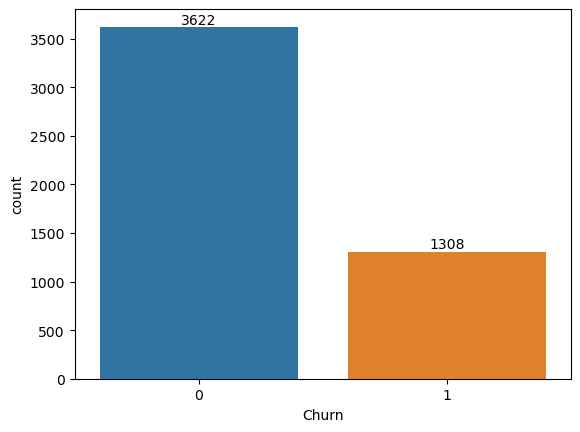

In [33]:
# Check distribution of our label data
ax = sns.countplot(data = train_set, x = "Churn", label = train_set["Churn"].unique())
ax.bar_label(ax.containers[0])

[Text(0, 0, '1308'), Text(0, 0, '1308')]

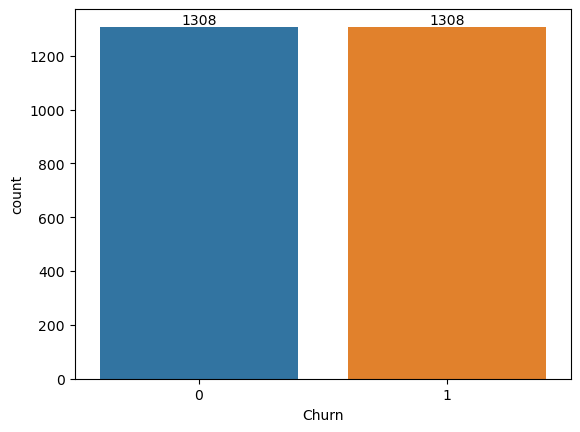

In [34]:
ax = sns.countplot(data = train_set_bal, x = "Churn", label = train_set["Churn"].unique())
ax.bar_label(ax.containers[0])

### 8.2 Gender Distribution

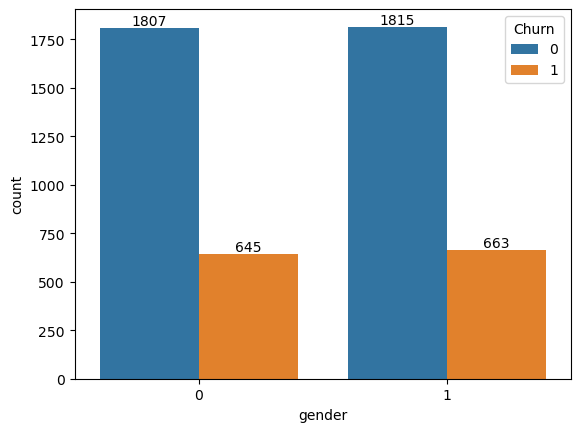

In [35]:
# Check distribution of gender
ax = sns.countplot(data=train_set, x="gender", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

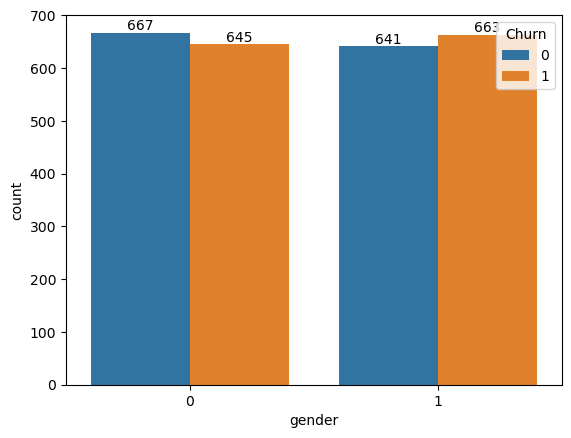

In [36]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="gender", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'gender' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['gender'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_gen = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_gen.columns = ['gender', 'Count']

### 8.3. SeniorCitizen Distribution

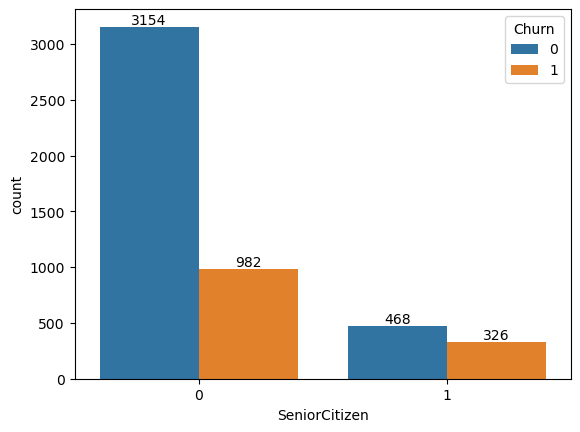

In [37]:
# Check distribution of SeniorCitizen
ax = sns.countplot(data=train_set, x="SeniorCitizen", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

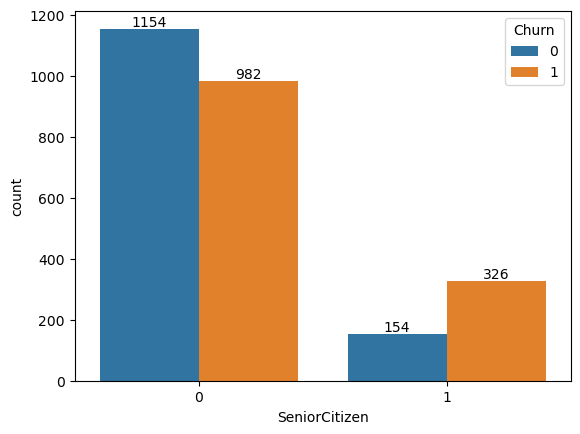

In [38]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="SeniorCitizen", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'SeniorCitizen' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['SeniorCitizen'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_sen = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_sen.columns = ['SeniorCitizen', 'Count']

### 8.4. Partner Distribution

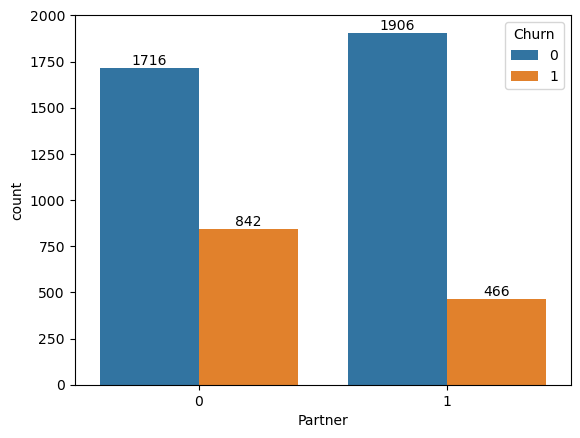

In [39]:
# Check distribution of Partner
ax = sns.countplot(data=train_set, x="Partner", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

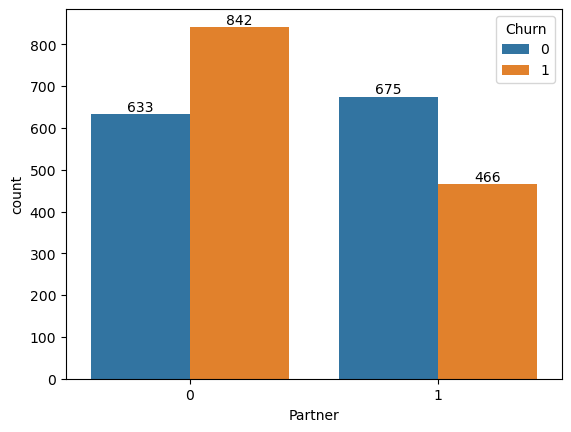

In [40]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="Partner", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'Partner' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['Partner'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_par = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_par.columns = ['Partner', 'Count']

### 8.5. Dependents Distribution

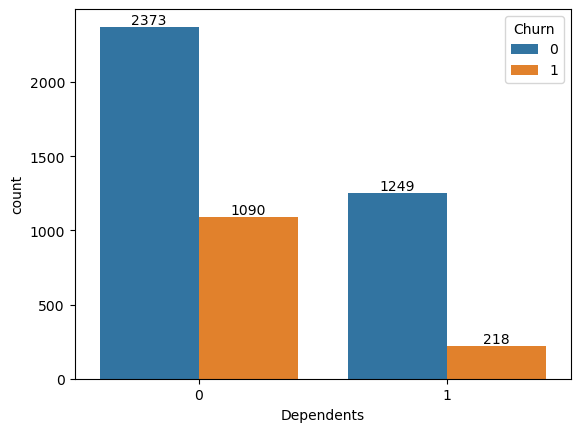

In [41]:
# Check distribution of Dependents
ax = sns.countplot(data=train_set, x="Dependents", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

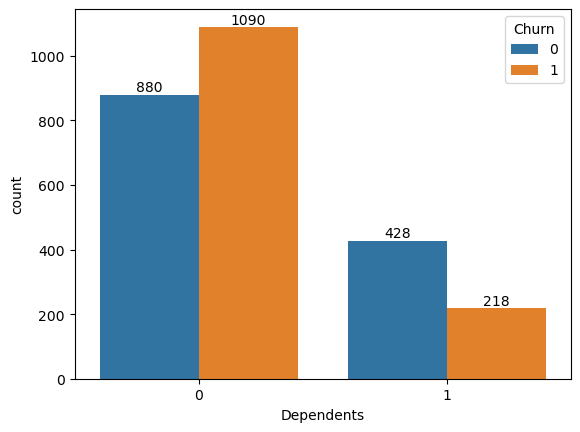

In [42]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="Dependents", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'Dependents' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['Dependents'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_dep = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_dep.columns = ['Dependents', 'Count']

### 8.6. PhoneService

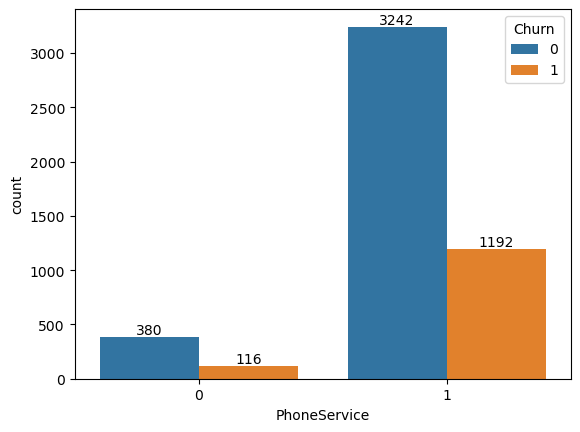

In [43]:
# Check distribution of PhoneService
ax = sns.countplot(data=train_set, x="PhoneService", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

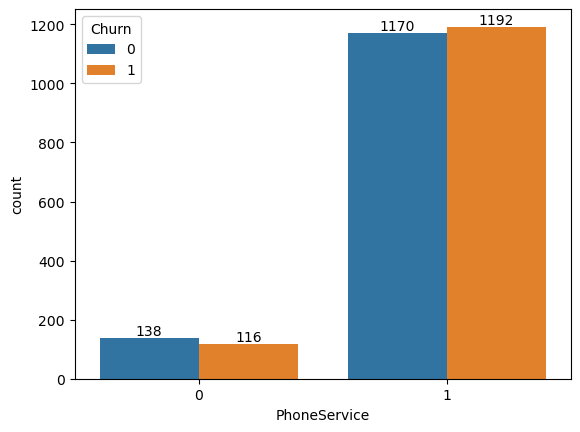

In [44]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="PhoneService", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'PhoneService' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['PhoneService'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_pho = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_pho.columns = ['PhoneService', 'Count']

### 8.7. MultipleLines

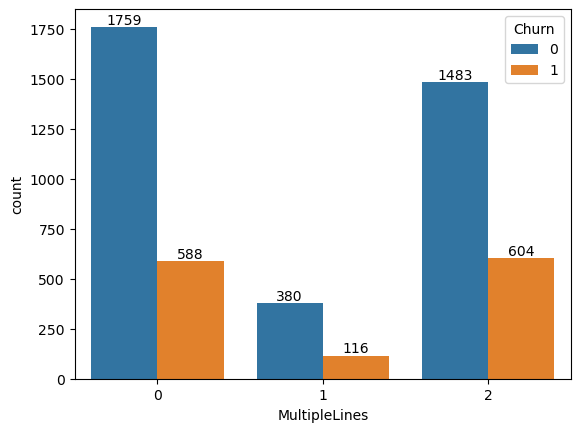

In [45]:
# Check distribution of MultipleLines
ax = sns.countplot(data=train_set, x="MultipleLines", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

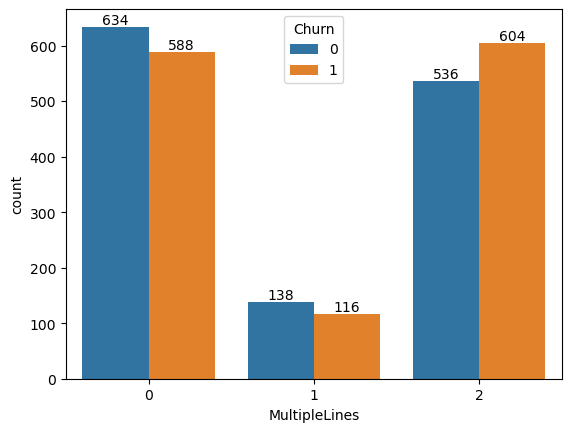

In [46]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="MultipleLines", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'MultipleLines' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['MultipleLines'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_mul = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_mul.columns = ['MultipleLines', 'Count']

### 8.8. InternetService

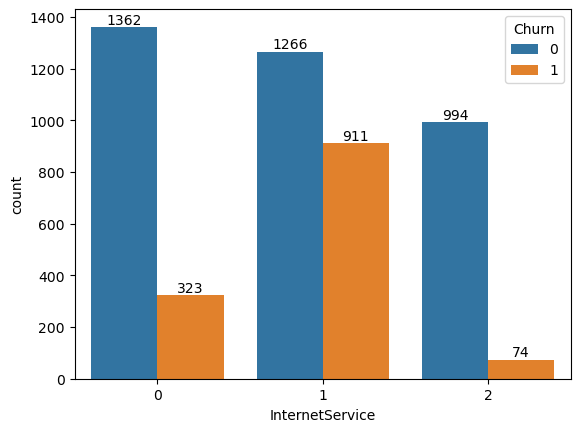

In [47]:
# Check distribution of InternetService
ax = sns.countplot(data=train_set, x="InternetService", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

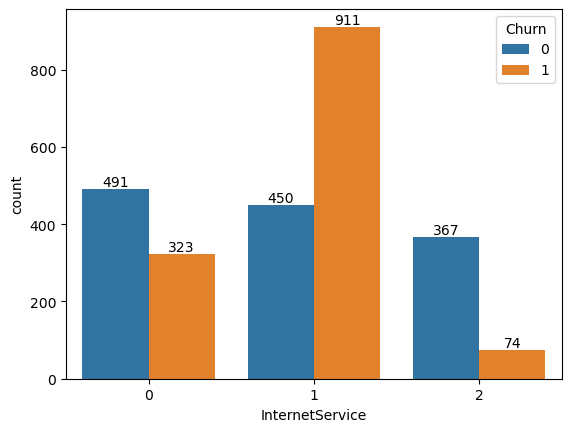

In [48]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="InternetService", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'InternetService' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['InternetService'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_int = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_int.columns = ['InternetService', 'Count']

### 8.9. OnlineSecurity

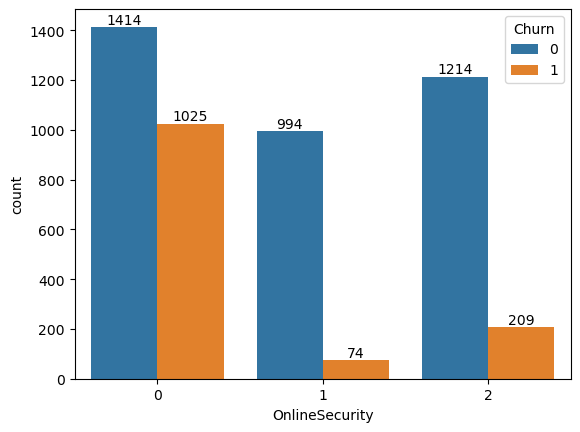

In [49]:
# Check distribution of OnlineSecurity
ax = sns.countplot(data=train_set, x="OnlineSecurity", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

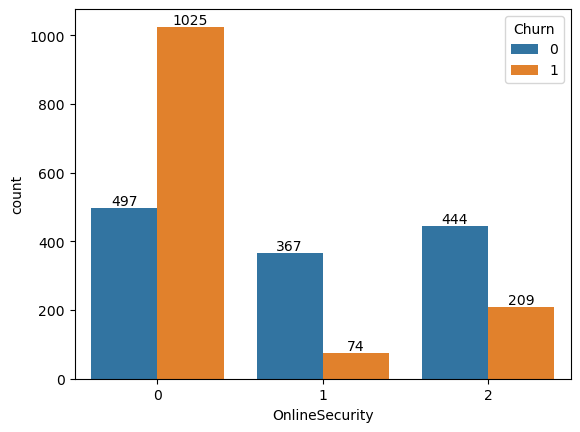

In [50]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="OnlineSecurity", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'OnlineSecurity' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['OnlineSecurity'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_onls = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_onls.columns = ['OnlineSecurity', 'Count']

### 8.10. OnlineBackup

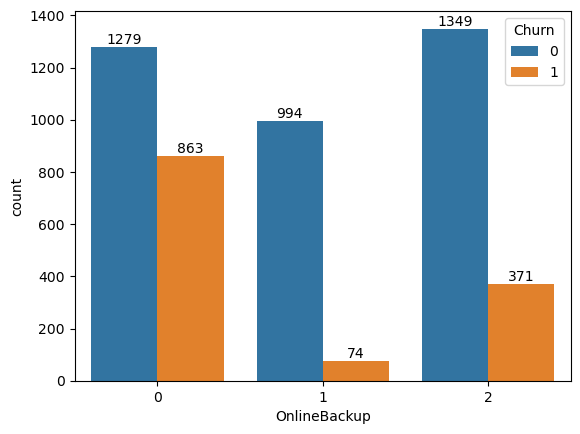

In [51]:
# Check distribution of OnlineBackup
ax = sns.countplot(data=train_set, x="OnlineBackup", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

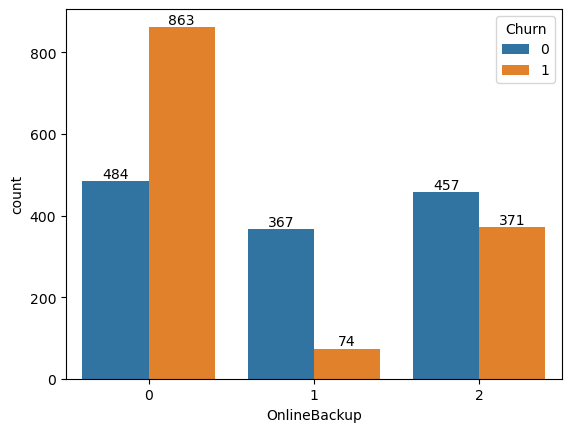

In [52]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="OnlineBackup", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'OnlineBackup' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['OnlineBackup'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_onlb = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_onlb.columns = ['OnlineBackup', 'Count']

### 8.11. DeviceProtection

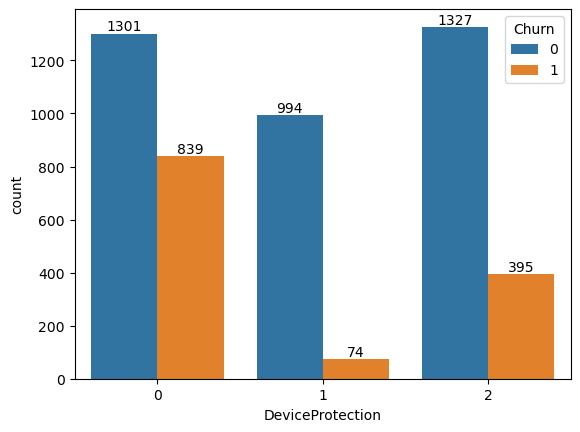

In [53]:
# Check distribution of DeviceProtection
ax = sns.countplot(data=train_set, x="DeviceProtection", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

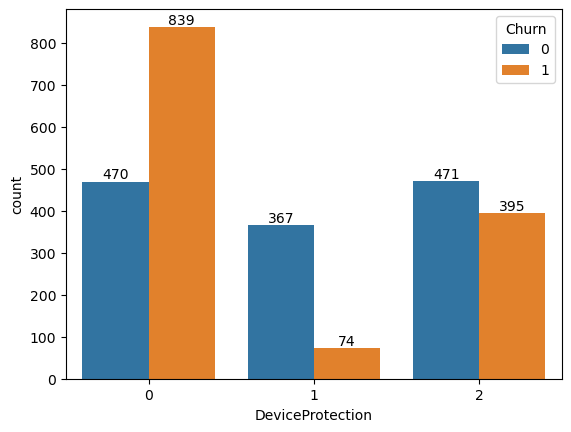

In [54]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="DeviceProtection", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'DeviceProtection' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['DeviceProtection'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_dev = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_dev.columns = ['DeviceProtection', 'Count']

### 8.12. TechSupport

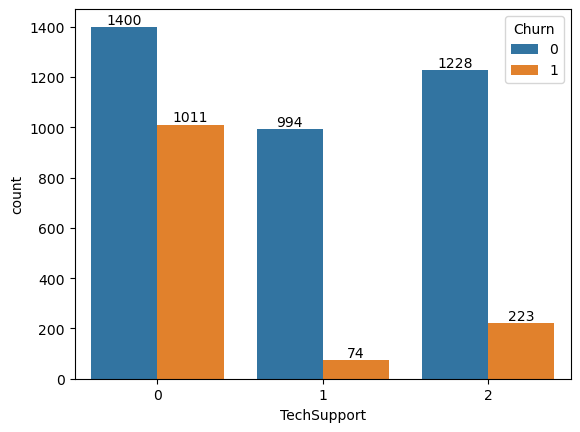

In [55]:
# Check distribution of TechSupport
ax = sns.countplot(data=train_set, x="TechSupport", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

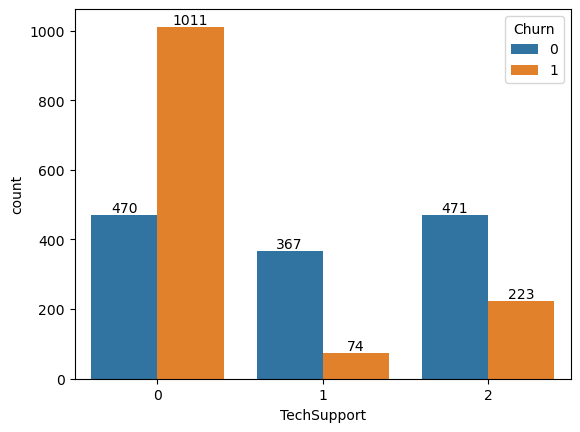

In [56]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="TechSupport", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'TechSupport' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['TechSupport'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_tec = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_tec.columns = ['TechSupport', 'Count']

### 8.13. StreamingTV

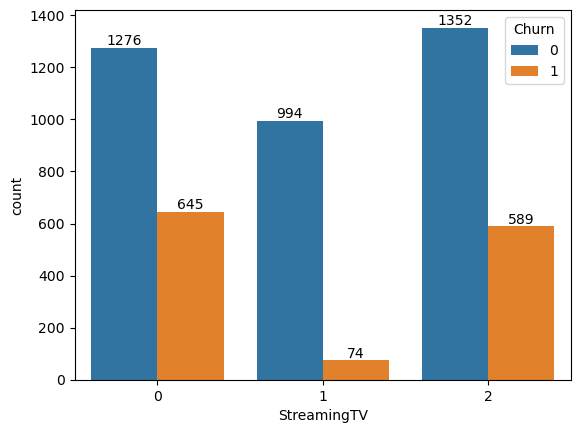

In [57]:
# Check distribution of StreamingTV
ax = sns.countplot(data=train_set, x="StreamingTV", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

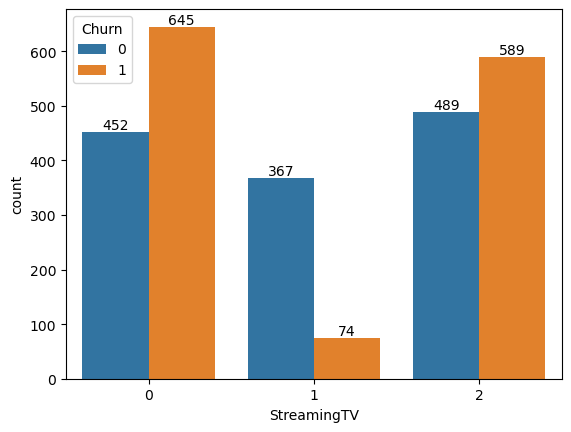

In [58]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="StreamingTV", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'StreamingTV' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['StreamingTV'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_stv = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_stv.columns = ['StreamingTV', 'Count']

### 8.14. StreamingMovies

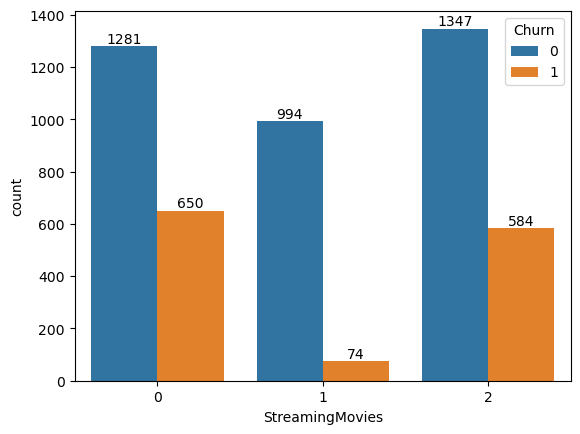

In [59]:
# Check distribution of StreamingMovies
ax = sns.countplot(data=train_set, x="StreamingMovies", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

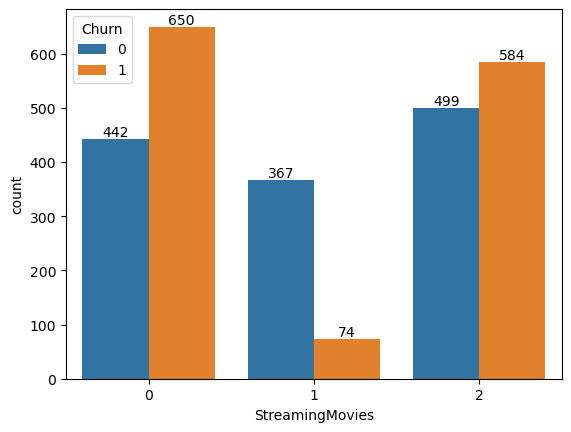

In [60]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="StreamingMovies", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'StreamingMovies' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['StreamingMovies'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_smv = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_smv.columns = ['StreamingMovies', 'Count']

### 8.15. Contract Distribution

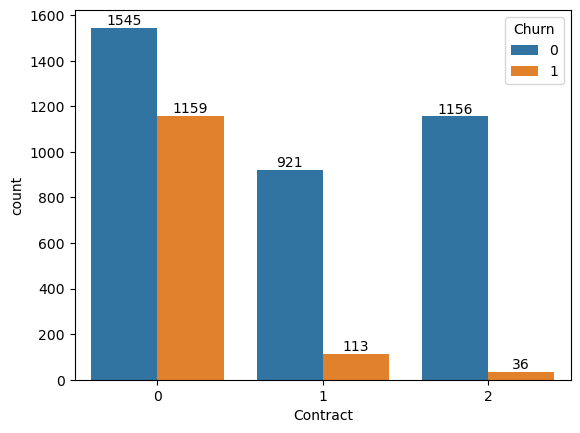

In [61]:
# Check distribution of Contract
ax = sns.countplot(data=train_set, x="Contract", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

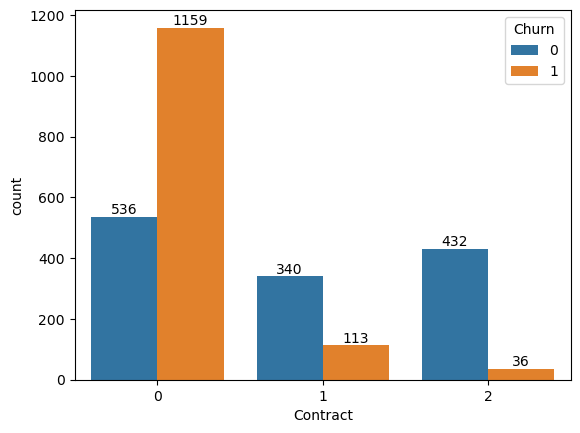

In [62]:
# Dist for balanced data
ax = sns.countplot(data=train_set_bal, x="Contract", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'Contract' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['Contract'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_con = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_con.columns = ['Contract', 'Count']

### 8.16. PaperlessBilling

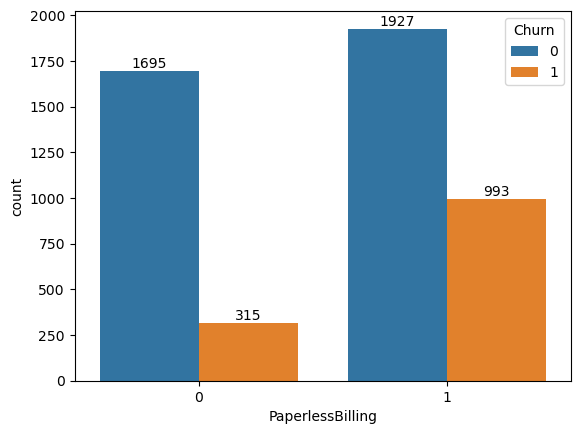

In [63]:
# Check distribution of PaperlessBilling
ax = sns.countplot(data=train_set, x="PaperlessBilling", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

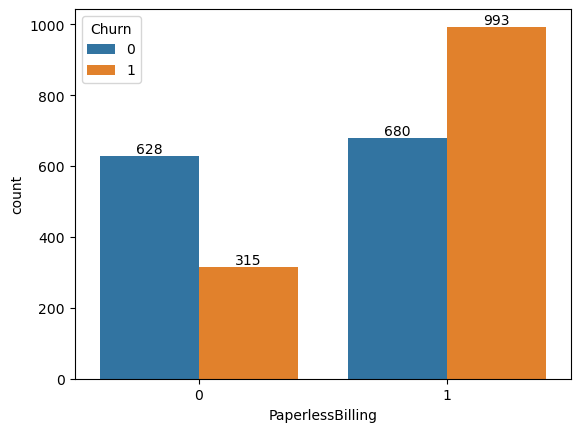

In [64]:
# Dist for balanced data
ax= sns.countplot(data=train_set_bal, x="PaperlessBilling", hue="Churn")
ax.bar_label(ax.containers[0])  # Show count on top of the bars
ax.bar_label(ax.containers[1])  # Show count on top of the bars
plt.show()

# Get the value counts for 'PaperlessBilling' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['PaperlessBilling'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_pap = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_pap.columns = ['PaperlessBilling', 'Count']

### 8.17. PaymentMethod

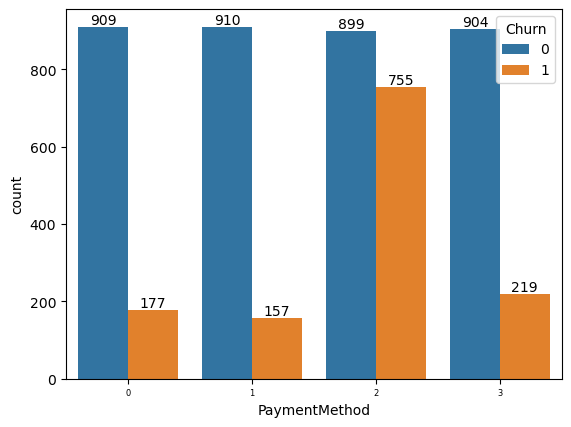

In [65]:
# Check distribution of PaymentMethod
ax = sns.countplot(data=train_set, x="PaymentMethod", hue="Churn")
ax.bar_label(ax.containers[0], fontsize = 10)  # Show count on top of the bars
ax.bar_label(ax.containers[1], fontsize = 10)  # Show count on top of the bars

# Reduce the x-axis text size
ax.xaxis.set_tick_params(labelsize=6)

plt.show()

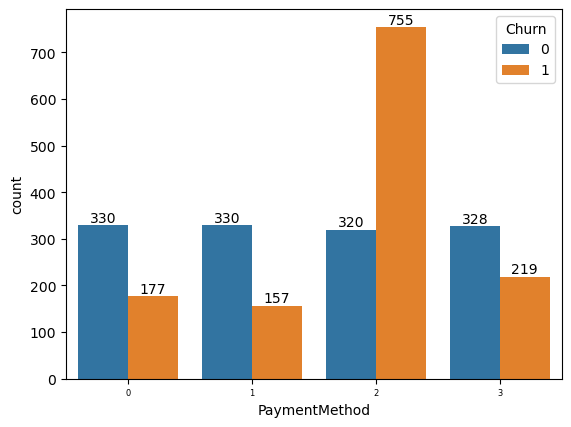

In [66]:
# Check distribution of PaymentMethod
ax = sns.countplot(data=train_set_bal, x="PaymentMethod", hue="Churn")
ax.bar_label(ax.containers[0], fontsize = 10)  # Show count on top of the bars
ax.bar_label(ax.containers[1], fontsize = 10)  # Show count on top of the bars

# Reduce the x-axis text size
ax.xaxis.set_tick_params(labelsize=6)

plt.show()

# Get the value counts for 'PaymentMethod' column in train_set_bal DataFrame
train_set_bal_counts = train_set_bal['PaymentMethod'].value_counts()

# Create a DataFrame from the value counts
train_set_bal_pay = pd.DataFrame(train_set_bal_counts).reset_index()
train_set_bal_pay.columns = ['PaymentMethod', 'Count']

### 8.18. tenure

<Axes: xlabel='tenure', ylabel='Density'>

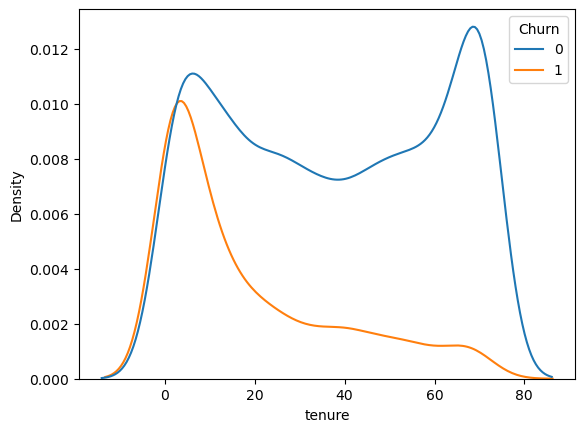

In [67]:
# Check distribution of tenure
sns.kdeplot(data = train_set, x = "tenure", hue = "Churn")

In [68]:
train_set["tenure"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    4930.000000
mean       32.471197
std        24.646350
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
80%        61.000000
85%        66.000000
90%        69.000000
95%        72.000000
97%        72.000000
98%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure'>

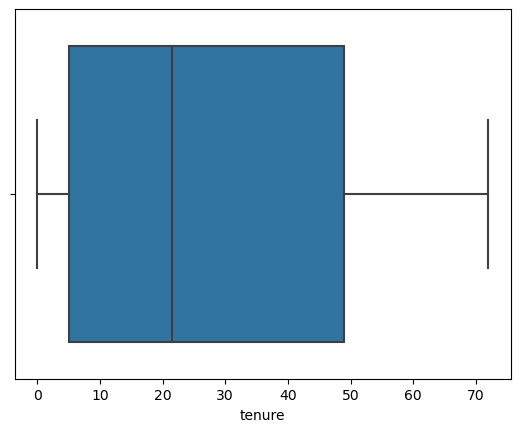

In [69]:
sns.boxplot(data = train_set_bal, x = "tenure")

In [70]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["tenure"].quantile(0.25)
q3 = train_set_bal["tenure"].quantile(0.75)
iqr = q3 - q1

In [71]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_ten = train_set_bal[~((train_set_bal["tenure"] < (q1 - 1.5 * iqr)) | (train_set_bal["tenure"] > (q3 + 1.5 * iqr)))].copy()

<Axes: xlabel='tenure', ylabel='Density'>

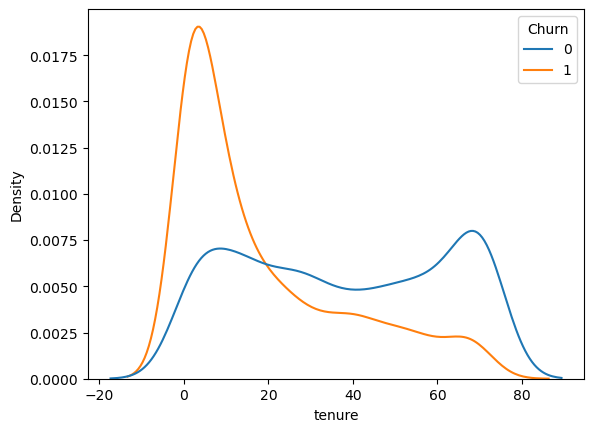

In [72]:
sns.kdeplot(data = train_set_bal_ten, x = "tenure", hue = "Churn")

In [73]:
train_set_bal_ten

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
4,0,0,0,0,1,2,1,0,0,0,0,2,0,0,0,2,34,85.35,2896.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,1,1,1,0,1,0,0,0,0,2,0,0,1,1,42,77.95,3384.00,1
2612,1,0,0,0,1,2,1,0,2,0,0,2,2,0,1,2,43,101.40,4528.00,1
2613,1,1,1,0,1,0,2,1,1,1,1,1,1,0,0,3,11,19.95,214.75,1
2614,1,0,0,0,1,2,1,0,0,0,0,2,0,0,0,0,53,85.45,4517.25,1


### 8.19. MonthlyCharges

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

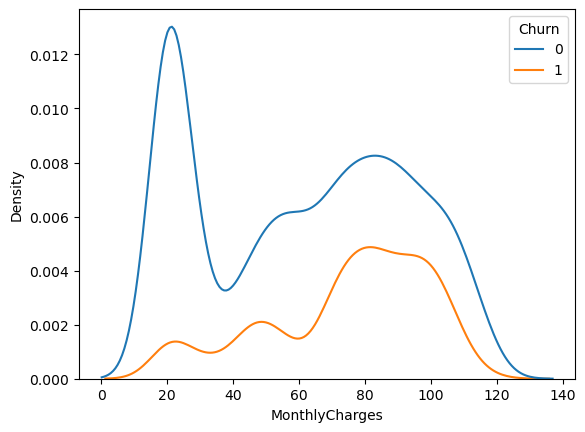

In [74]:
# Check distribution of MonthlyCharges
sns.kdeplot(data = train_set, x = "MonthlyCharges", hue = "Churn")

In [75]:
train_set["MonthlyCharges"].describe(percentiles = [.01, .05, .10, .15, .25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    4930.000000
mean       64.950081
std        30.243674
min        18.400000
1%         19.200000
5%         19.650000
10%        20.050000
15%        20.600000
25%        35.500000
50%        70.575000
75%        90.050000
80%        94.450000
85%        98.832500
90%       103.250000
95%       107.527500
97%       110.450000
98%       112.292000
99%       115.085500
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='MonthlyCharges'>

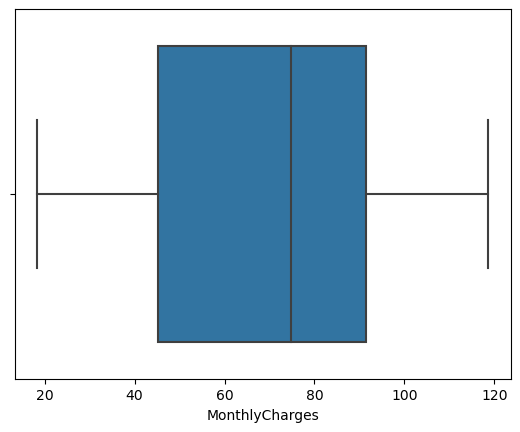

In [76]:
sns.boxplot(data = train_set_bal, x = "MonthlyCharges")

In [77]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["MonthlyCharges"].quantile(0.25)
q3 = train_set_bal["MonthlyCharges"].quantile(0.75)
iqr = q3 - q1

In [78]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_mon = train_set_bal[~((train_set_bal["MonthlyCharges"] < (q1 - 1.5 * iqr)) | (train_set_bal["MonthlyCharges"] > (q3 + 1.5 * iqr)))].copy()

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

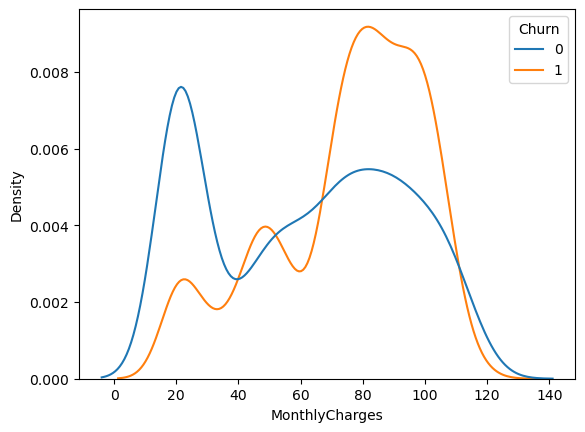

In [79]:
sns.kdeplot(data = train_set_bal_mon, x = "MonthlyCharges", hue = "Churn")

In [80]:
train_set_bal_mon

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
4,0,0,0,0,1,2,1,0,0,0,0,2,0,0,0,2,34,85.35,2896.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,1,1,1,0,1,0,0,0,0,2,0,0,1,1,42,77.95,3384.00,1
2612,1,0,0,0,1,2,1,0,2,0,0,2,2,0,1,2,43,101.40,4528.00,1
2613,1,1,1,0,1,0,2,1,1,1,1,1,1,0,0,3,11,19.95,214.75,1
2614,1,0,0,0,1,2,1,0,0,0,0,2,0,0,0,0,53,85.45,4517.25,1


### 8.20. TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Density'>

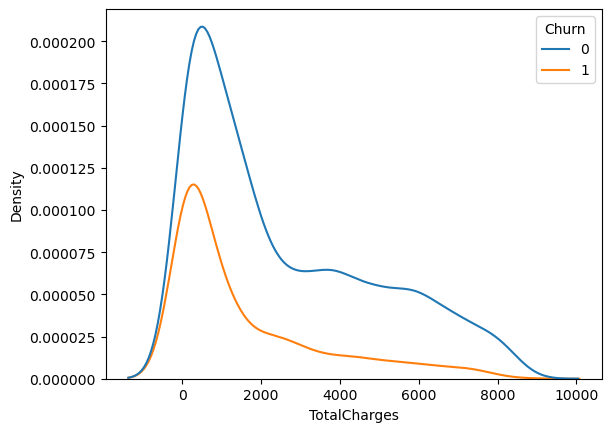

In [81]:
# Check distribution of TotalCharges
sns.kdeplot(data = train_set, x = "TotalCharges", hue = "Churn")

In [82]:
train_set["TotalCharges"].describe(percentiles = [.01, .05, .10, .15, .25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    4930.000000
mean     2301.796146
std      2292.567872
min        -1.000000
1%         19.764500
5%         48.972500
10%        84.500000
15%       163.567500
25%       396.325000
50%      1387.400000
75%      3857.012500
80%      4520.410000
85%      5264.890000
90%      6038.965000
95%      6989.587500
97%      7494.291500
98%      7785.685000
99%      8064.446500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: xlabel='TotalCharges'>

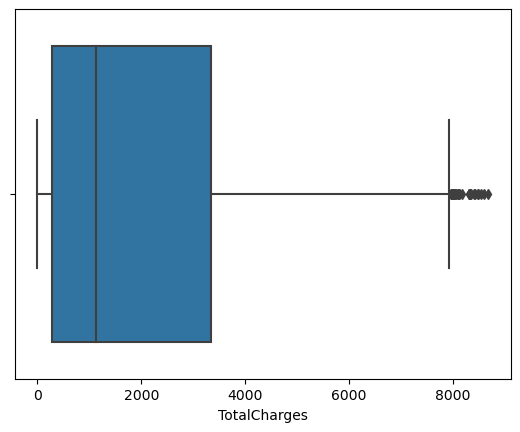

In [83]:
sns.boxplot(data = train_set_bal, x = "TotalCharges")

In [84]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["TotalCharges"].quantile(0.25)
q3 = train_set_bal["TotalCharges"].quantile(0.75)
iqr = q3 - q1

In [85]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_tot = train_set_bal[~((train_set_bal["TotalCharges"] < (q1 - 1.5 * iqr)) | (train_set_bal["TotalCharges"] > (q3 + 1.5 * iqr)))].copy()

<Axes: xlabel='TotalCharges', ylabel='Density'>

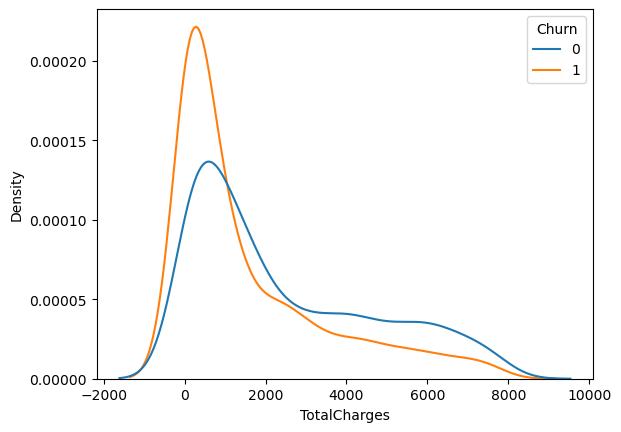

In [86]:
sns.kdeplot(data = train_set_bal_tot, x = "TotalCharges", hue = "Churn")

In [87]:
train_set_bal_tot

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
4,0,0,0,0,1,2,1,0,0,0,0,2,0,0,0,2,34,85.35,2896.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,1,1,1,0,1,0,0,0,0,2,0,0,1,1,42,77.95,3384.00,1
2612,1,0,0,0,1,2,1,0,2,0,0,2,2,0,1,2,43,101.40,4528.00,1
2613,1,1,1,0,1,0,2,1,1,1,1,1,1,0,0,3,11,19.95,214.75,1
2614,1,0,0,0,1,2,1,0,0,0,0,2,0,0,0,0,53,85.45,4517.25,1


### 8.21. Cleaned Data

In [88]:
train_set_bal_cleaned = pd.concat(
    [
        train_set_bal_ten,
        train_set_bal_mon,
        train_set_bal_tot
    ]
)

train_set_bal_cleaned

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
4,0,0,0,0,1,2,1,0,0,0,0,2,0,0,0,2,34,85.35,2896.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,0,1,1,1,0,1,0,0,0,0,2,0,0,1,1,42,77.95,3384.00,1
2612,1,0,0,0,1,2,1,0,2,0,0,2,2,0,1,2,43,101.40,4528.00,1
2613,1,1,1,0,1,0,2,1,1,1,1,1,1,0,0,3,11,19.95,214.75,1
2614,1,0,0,0,1,2,1,0,0,0,0,2,0,0,0,0,53,85.45,4517.25,1


In [89]:
count_duplicated_index = train_set_bal_cleaned.index.value_counts()
count_duplicated_index

2615    3
0       3
1       3
2       3
3       3
       ..
319     2
216     2
202     2
173     2
2565    2
Length: 2616, dtype: int64

In [90]:
used_index_data = count_duplicated_index[count_duplicated_index == 3].index

In [91]:
train_set_bal_cleaned = train_set_bal_cleaned.loc[used_index_data].drop_duplicates()

In [92]:
#Standardizing Numeric Attributes

scaler= StandardScaler()

num_cols = ["tenure","MonthlyCharges","TotalCharges"]

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [93]:
train_set_bal_cleaned

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
2615,0,1,0,0,1,2,1,0,0,0,0,2,0,0,1,1,5,83.15,446.05,1
0,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,57,19.75,1272.05,0
1,1,0,1,0,0,1,0,0,2,2,2,0,2,1,1,0,70,51.05,3635.15,0
2,0,0,1,0,1,2,1,0,0,2,2,2,2,1,1,0,61,103.30,6518.35,0
3,0,0,0,0,1,2,1,0,0,2,0,2,2,0,0,0,41,98.05,3990.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0,1,1,0,1,2,0,2,2,2,2,2,2,2,1,0,70,92.20,6474.45,0
28,1,0,1,1,1,0,1,0,2,2,2,2,0,1,0,0,28,92.90,2768.35,0
29,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,3,7,45.75,344.20,0
30,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,17,94.20,1608.15,0


### 8.22. Pairplot

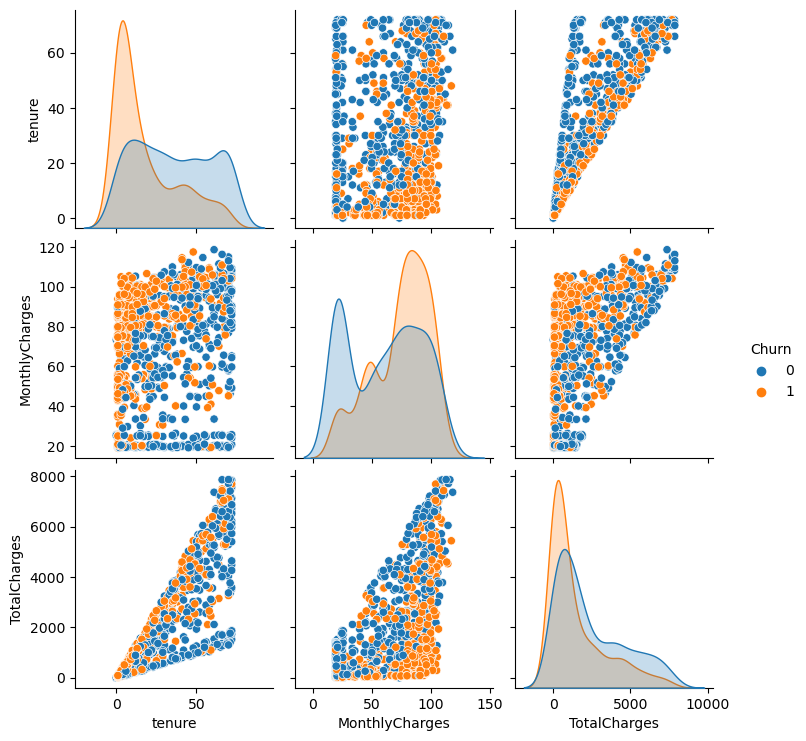

In [94]:
sns.pairplot(
    train_set_bal_cleaned[
        [
            "tenure",
            "MonthlyCharges",
            "TotalCharges",
            "Churn"
        ]
    ].sample(1000),
    hue = "Churn"
)

<Axes: >

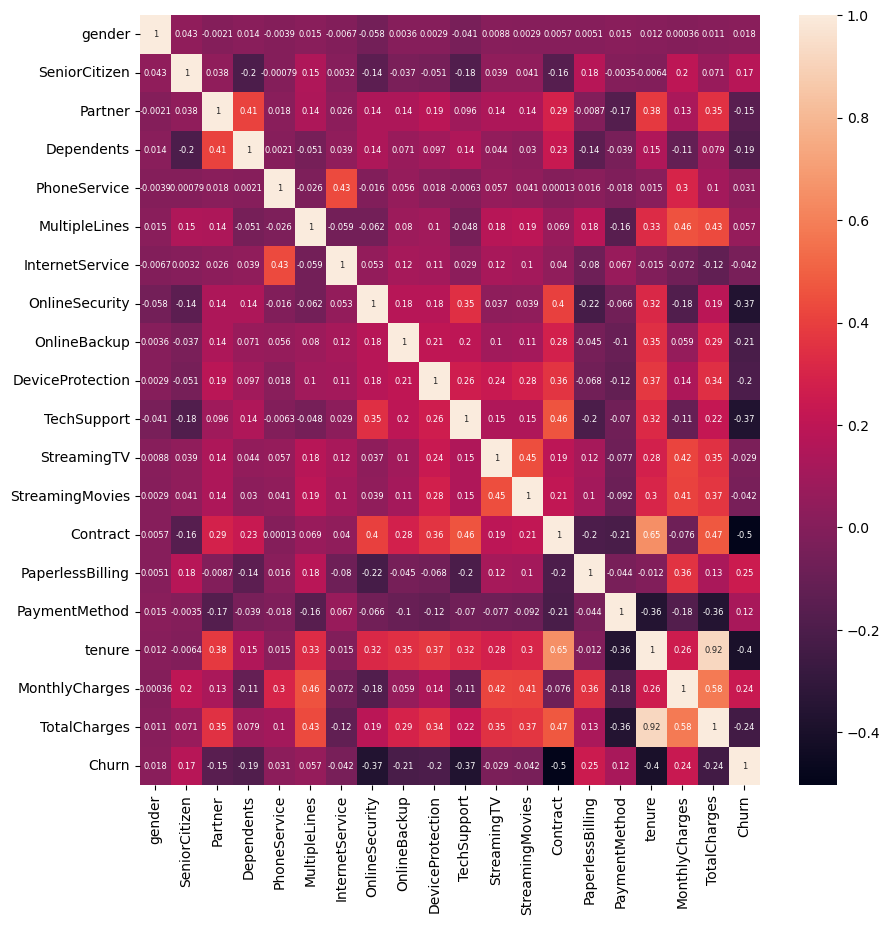

In [95]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal_cleaned.corr(method="spearman"), annot=True, annot_kws={"fontsize": 6}, ax=ax)

## 8.23. Dump Trainset

In [96]:
utils.pickle_dump(train_set_bal_cleaned[config["Predictors"]], config["train_feng_set_path"][0])
utils.pickle_dump(train_set_bal_cleaned[config["Label"]], config["train_feng_set_path"][1])

utils.pickle_dump(valid_set[config["Predictors"]], config["valid_feng_set_path"][0])
utils.pickle_dump(valid_set[config["Label"]], config["valid_feng_set_path"][1])

utils.pickle_dump(test_set[config["Predictors"]], config["test_feng_set_path"][0])
utils.pickle_dump(test_set[config["Label"]], config["test_feng_set_path"][1])

In [97]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [98]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

In [99]:
# nan_columns = x_train.columns[x_train.isna().any()].tolist()
# print(nan_columns)

In [100]:
# string_columns = x_train.select_dtypes(include='object',).columns.tolist()
# print(string_columns)

In [101]:
x_train.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [102]:
y_train.dtypes

dtype('int64')

## 9. Training Model

In [103]:
# Menggunakan KNN Method
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train, y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test, y_test)
print("KNN accuracy:", accuracy_knn)


KNN accuracy: 0.7114474929044465


In [105]:
# Menggunakan Random Forest Method
from sklearn import metrics

feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges']

# x_train = pd.DataFrame(x_train, columns=feature_names)
# x_test = pd.DataFrame(x_test, columns=feature_names)

model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(f"Accuracy: {accuracy}")

# Print feature importances with corresponding names
importances = model_rf.feature_importances_
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")


Accuracy: 0.7398297067171239
gender: 0.002580219180561738
SeniorCitizen: 0.006397850067340418
Partner: 0.004028413516711502
Dependents: 0.006660333693152524
PhoneService: 0.0023550341882766198
MultipleLines: 0.006067958663316817
InternetService: 0.06705991372378095
OnlineSecurity: 0.12330486766490092
OnlineBackup: 0.020499821854953734
DeviceProtection: 0.013801391471833792
TechSupport: 0.11832984830299843
StreamingTV: 0.007273612522433256
StreamingMovies: 0.00859876570494261
Contract: 0.24396078036226754
PaperlessBilling: 0.021995658183680888
PaymentMethod: 0.030676248188471464
tenure: 0.14066145430105448
MonthlyCharges: 0.09239405046755994
TotalCharges: 0.08335377794176238


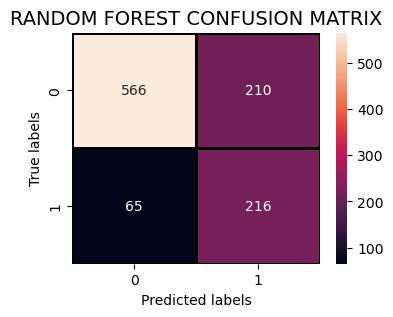

In [106]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
            annot=True, fmt="d", linecolor="k", linewidths=1)

plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## 10. Dump Model Object

In [107]:
with open(config["production_model_path"], "wb") as file:
    pickle.dump(model_rf, file)